In [43]:
import json

# load IT skill JDs
def load_data_skill(filename):
    with open(filename, 'r') as f:
        data = json.load(f)

    f.close()
    
    return list(data)

total_skill_jds = load_data_skill('data//train/total_skill_jds.json')

In [44]:
def nomalize_skill(skill):
    for i in range(len(skill)):
        skill[i] = [item.lower() for item in skill[i]]
    
    return skill

total_skill_jds = nomalize_skill(total_skill_jds)

In [57]:
len(total_skill_jds)

26681

# Find Frequency of each skill

In [45]:
def get_frequency_skill(skills_jds):

    frequency_skills = {}
    for skills in skills_jds:
        for skill in skills:
            if skill not in list(frequency_skills.keys()):
                frequency_skills[skill] = 1
            else:
                frequency_skills[skill] += 1

     # Sort the dictionary by frequency in descending order
    sorted_frequency_skills = dict(sorted(frequency_skills.items(), key=lambda item: item[1], reverse=True))
    
    return sorted_frequency_skills

In [46]:
frequency_skills = get_frequency_skill(total_skill_jds)

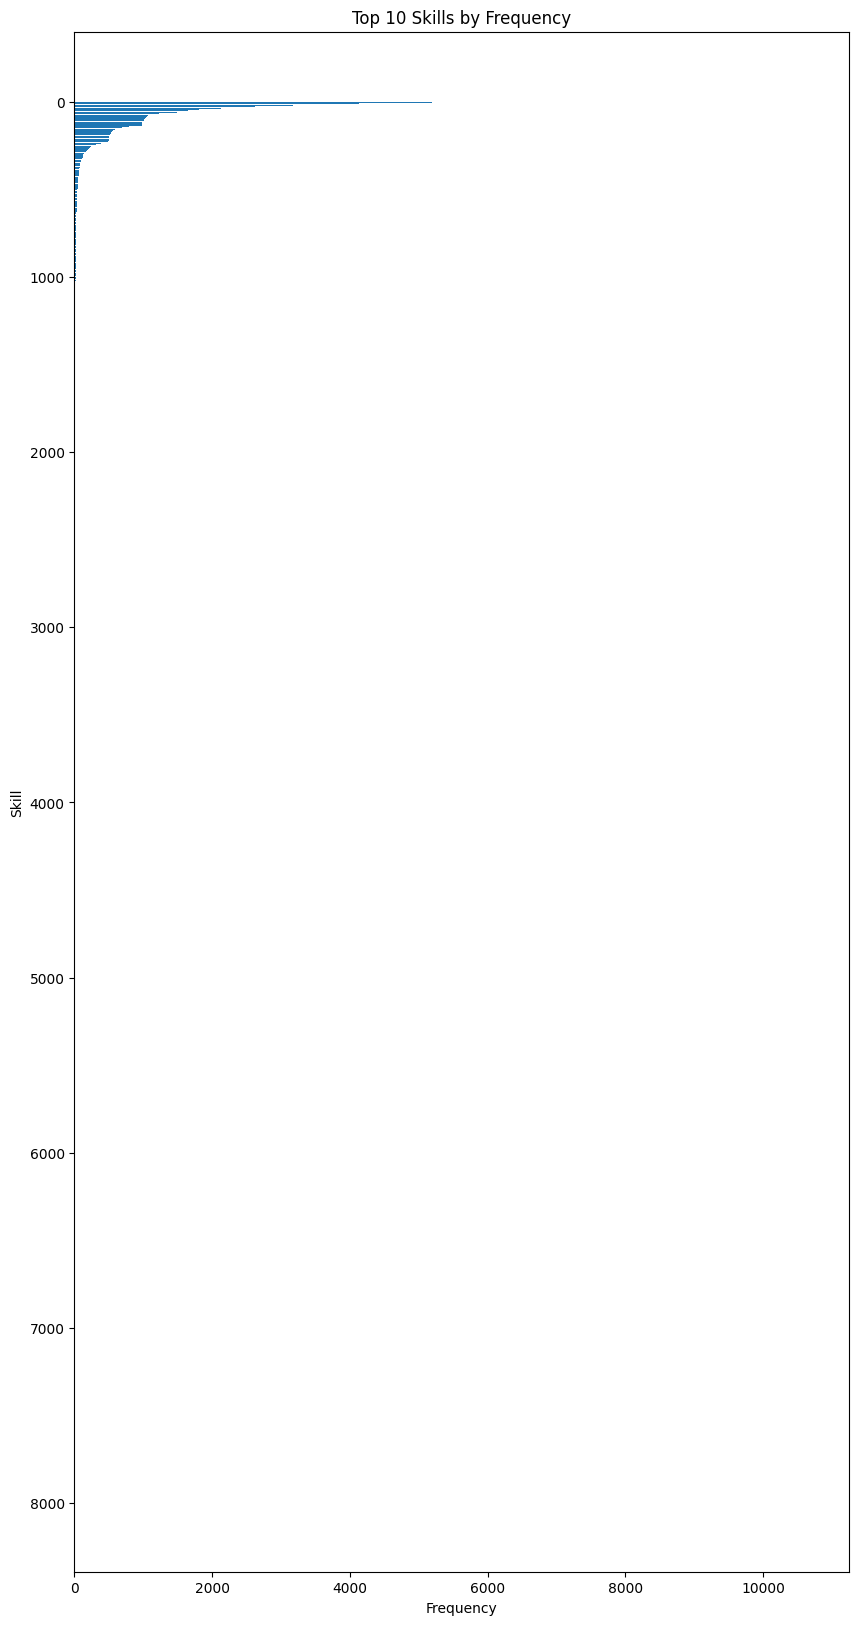

In [ ]:
import matplotlib.pyplot as plt

# Extract skill names and frequencies for plotting
skill_names = list(frequency_skills.keys())
skill_frequencies = list(frequency_skills.values())

min_x=0
min_y=-1
# Create a bar plot
plt.figure(figsize=(10, 20))
plt.barh(range(len(skill_names[min_x:min_y])), skill_frequencies[min_x:min_y])  # Display the top 10 skills
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.title('Top 10 Skills by Frequency')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most frequent skill at the top
plt.show()

In [47]:
def get_frequency_skill(skills_jds):

    frequency_skills = {}
    for skills in skills_jds:
        for skill in skills:
            if skill not in list(frequency_skills.keys()):
                frequency_skills[skill] = 1
            else:
                frequency_skills[skill] += 1

     # Sort the dictionary by frequency in descending order
    sorted_frequency_skills = dict(sorted(frequency_skills.items(), key=lambda item: item[1], reverse=True))
    
    return sorted_frequency_skills

In [48]:
min_count = 3
def filter_vocab_min_count(frequency_skills, min_count=min_count):
    result = {}
    for skills in frequency_skills.keys():

        if frequency_skills[skills] >= min_count:
            result[skills] = frequency_skills[skills]

    return result

filter_skills = filter_vocab_min_count(frequency_skills)

In [49]:
len(filter_skills)

3726

In [50]:
# find frequency of all skill when skill a is present
def find_frequency_skill(skill, k=-1, total_skill_jds=total_skill_jds):
    frequency = {}
    for i in range(len(total_skill_jds)):
        if skill in total_skill_jds[i]:
            for s in total_skill_jds[i]:
                if s in frequency:
                    frequency[s] += 1
                else:
                    frequency[s] = 1

    # sort frequency
    frequency = {k: v for k, v in sorted(frequency.items(), key=lambda item: item[1], reverse=True)}

    if k == -1:
        return frequency
    else:
        # return top k skill and remove top 1 (skill a)
        return {i: frequency[i] for i in list(frequency)[1:k+1]}

In [51]:
def find_frequency_skill_around(skill, k=-1, size=3, total_skill_jds=total_skill_jds):
    frequency = {}
    for skills in total_skill_jds:
        
        if skill in skills:
            # get sublist with size is from center to horizon
            index = skills.index(skill)
            sublist = list()
            start=int
            end=int
            if len(skills) <= size * 2 + 1:
                sublist = skills.copy()
            else:
                start = index - size
                end = index + size
                if start < 0:
                    start = 0
                if end > len(skills):
                    end=len(skills)

                sublist = skills[start:end].copy()

            for s in sublist:
                if s in frequency:
                    frequency[s] += 1
                else:
                    frequency[s] = 1
            
        else:
            continue

    # sort frequency
    frequency = {k: v for k, v in sorted(frequency.items(), key=lambda item: item[1], reverse=True)}

    if k == -1:
        return frequency
    else:
        # return top k skill and remove top 1 (skill a)
        return {i: frequency[i] for i in list(frequency)[1:k+1]}

In [52]:
valid_skills = {}

for skill in filter_skills.keys():

    valid_skills[skill] = list(find_frequency_skill_around(skill, 20).keys())
    #valid_skills[skill] = empty_skill

import json

json_path = 'data/valid/skills_valid.json'
with open(json_path, 'w') as f:
    json.dump(valid_skills, f, indent=4)

In [53]:
frequency = find_frequency_skill_around('python', 20, 5)
frequency

{'machine learning': 2990,
 'sql': 2545,
 'aws': 2482,
 'data science': 2007,
 'javascript': 2006,
 'ai': 1988,
 'business intelligence': 1971,
 'java': 1684,
 'docker': 1577,
 'c++': 1518,
 'devops': 1505,
 'data analysis': 1504,
 'algorithms': 1499,
 'tableau': 1497,
 'tensorflow': 1492,
 'data warehouse': 1491,
 'microsoft office': 1485,
 'hadoop': 1483,
 'agile': 1191,
 'linux': 1138}

In [54]:
# get removed skill
removed_skill = []
for skill in frequency_skills.keys():
    if frequency_skills[skill] < min_count:
        removed_skill.append(skill)

# save removed_skill

json_path = 'data/removed_skill.json'
with open(json_path, 'w') as f:
    json.dump(removed_skill, f, indent=4)

In [55]:
# save vocab
import json

json_path = 'data/vocab_no_filter_min_count.json'
with open(json_path, 'w') as f:
    json.dump(frequency_skills, f, indent=4)

In [56]:
# save vocab
import json

json_path = 'data/vocab_filter_min_count.json'
with open(json_path, 'w') as f:
    json.dump(filter_skills, f, indent=4)

# End